In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
data = np.loadtxt('../data/birth.txt')

# Problem 3a {-}

In [4]:
# Birth weights in kg
bwt = data[:,0]
bwt = bwt[bwt != 999] * 0.0283495
mu = np.mean(bwt)
print('Population mean = ', mu)

n = 100
X = random.sample(list(bwt), n)
sample_mean = np.mean(X)
print('Sample mean = ', sample_mean)

sig = np.std(bwt)
N = len(bwt)
se = sig / math.sqrt(n) * math.sqrt(1 - (n - 1) / (N - 1))
print('Exact standard error of sample mean = ', se)

Population mean =  3.389944216423948
Sample mean =  3.33049926
Exact standard error of sample mean =  0.04956392357753126


# Problem 3b {-}

In [5]:
B = 10 ** 3
P_boot = X * round(N / n)

def get_bootstrap_estimate():
    # Generate B simple random samples from P_boot and store sample means
    means = []

    for _ in range(B):
        means.append(np.mean(random.sample(P_boot, n)))

    # Compute bootstrap estimate of standard error of mean 
    avg = sum(means) / B    # avg of sample means
    se_hat = math.sqrt((1 / B) * sum([(mean - avg) ** 2 for mean in means]))
    
    return se_hat

print('Boostrap estimate of standard error of sample mean = ', get_bootstrap_estimate())

Boostrap estimate of standard error of sample mean =  0.04883765703664657


# Problem 3c {-}

In [6]:
B = 10 ** 3
k, r = divmod(N, n)

P_boot1 = X * k
P_boot2 = X * (k + 1)

p = (1 - r / n) * (1 - r / (N - 1))

def get_bootstrap_estimate2():
    # Generate B simple random samples from P_boot and store sample means
    means = []

    for _ in range(B):
        if random.random() < p:
            means.append(np.mean(random.sample(P_boot1, n)))
        else:
            means.append(np.mean(random.sample(P_boot2, n)))

    # Compute bootstrap estimate of standard error of mean 
    avg = sum(means) / B    # avg of sample means
    se_hat = math.sqrt((1 / B) * sum([(mean - avg) ** 2 for mean in means]))
    
    return se_hat

print('Boostrap estimate of standard error of sample mean = ', get_bootstrap_estimate2())

Boostrap estimate of standard error of sample mean =  0.045895606202961264


# Problem 3d {-}

In [7]:
estimates1 = [get_bootstrap_estimate() for _ in range(100)]
estimates2 = [get_bootstrap_estimate2() for _ in range(100)]

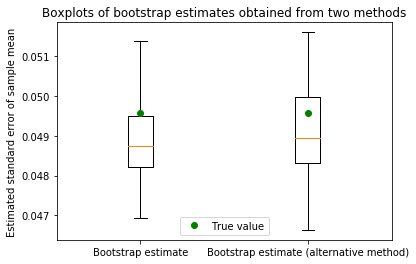

In [8]:
plt.boxplot([estimates1, estimates2])
plt.plot([1, 2], [se, se], 'go', label='True value')
plt.xticks([1, 2], ['Bootstrap estimate', 'Bootstrap estimate (alternative method)'])
plt.ylabel('Estimated standard error of sample mean')
plt.legend()
plt.title('Boxplots of bootstrap estimates obtained from two methods')
plt.show()